## Name: Nguyen Minh Huy Duong
### Assignment 1

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('used_cars_data.csv')
dataset.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 1. Data cleaning

In [3]:
# Remove the "S.No." and "New_Price" columns
dataset.drop(labels=["S.No.", "New_Price"], axis=1, inplace=True)
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
# Create "Car_Age" column
from datetime import datetime
current_year = datetime.now().year
dataset["Car_Age"] = current_year - dataset["Year"]
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [5]:
# Find the 2 vehicle with missing Mileage
dataset.query('Mileage != Mileage')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


According to carwale.com (https://www.carwale.com/mahindra-cars/verito/15-d4-bs-iv/#:~:text=Mahindra%20Verito%201.5%20D4%20BS%2DIV%20Summary&text=7.70%20Lakh.,a%20mileage%20of%2021%20kmpl.) the Mileage of Mahindra E Verito D4 is 21kmpl \
According to fueleconomy.gov (https://www.fueleconomy.gov/feg/Find.do?action=sbs&id=30919) the Mileage of Toyota Prius 2011 is 48 MPG equal to 20.41 kmpl \
All the car as same model and year should have similar Mileage

In [6]:
new_mileage = [[4446, "21 kmpl"], [4904, "20.41 kmpl"]]
for data in new_mileage:
    dataset.loc[data[0], 'Mileage'] = data[1]
dataset.query('Fuel_Type == "Electric"')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,21 kmpl,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,20.41 kmpl,1798 CC,73 bhp,5.0,12.75,13


### 2. Transformation

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [8]:
# Split Mileage, Engine and Power column into pair of column Value and Unit
temp_dataset = dataset.copy()
temp_dataset[['Mileage Value', 'Mileage Unit']] = temp_dataset['Mileage'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset[['Engine Value', 'Engine Unit']] = temp_dataset['Engine'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset[['Power Value', 'Power Unit']] = temp_dataset['Power'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage Value,Mileage Unit,Engine Value,Engine Unit,Power Value,Power Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14,26.6,km/kg,998,CC,58.16,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9,19.67,kmpl,1582,CC,126.2,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13,18.2,kmpl,1199,CC,88.7,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12,20.77,kmpl,1248,CC,88.76,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11,15.2,kmpl,1968,CC,140.8,bhp


In [9]:
temp_dataset['Mileage Unit'].value_counts()

Mileage Unit
kmpl     7179
km/kg      74
Name: count, dtype: int64

In [10]:
temp_dataset['Engine Unit'].value_counts()

Engine Unit
CC    7207
Name: count, dtype: int64

In [11]:
temp_dataset['Power Unit'].value_counts()

Power Unit
bhp    7078
Name: count, dtype: int64

From the result only Mileage have more than 1 type of Unit which are "kmpl" and "km/kg" \
Since the number of data in "kmpl" is way more than "km/kg", we will convert the data into "kmpl" to minimize the number of calculation

In [12]:
dataset['Mileage'] = np.where(temp_dataset['Mileage Unit'] == 'km/kg',
                              temp_dataset['Mileage Value'].astype(float) * 1.4,
                              temp_dataset['Mileage Value'].astype(float))

dataset['Engine'] = np.where(pd.notnull(temp_dataset['Engine Value']), 
                             temp_dataset['Engine Value'].astype(float), 
                             np.nan)

dataset['Power'] = np.where(pd.notnull(temp_dataset['Power Value']), 
                             temp_dataset['Power Value'].astype(float), 
                             np.nan)


dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


### 3. Outlier dection and box-plot

In [14]:
# list of column to work on
col_list = ["Car_Age", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price"]

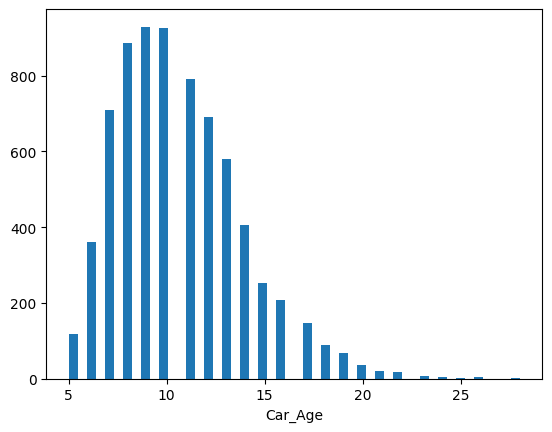

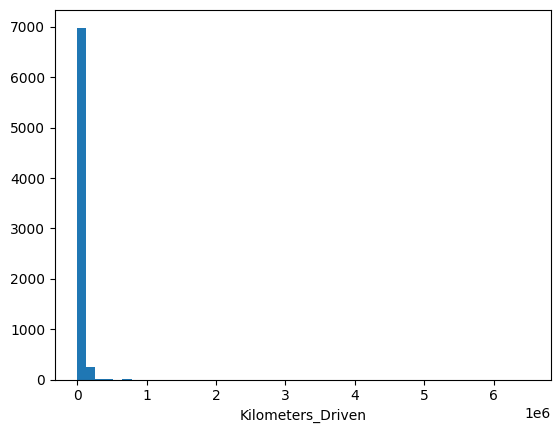

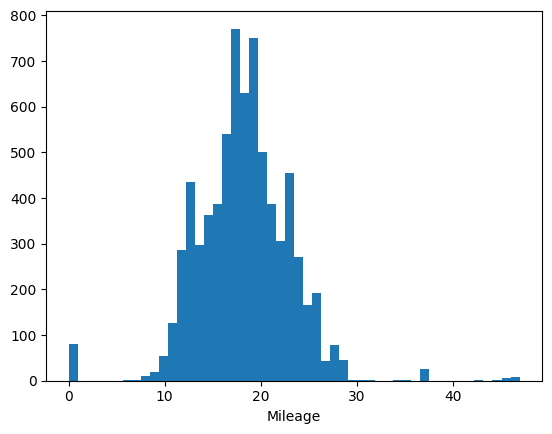

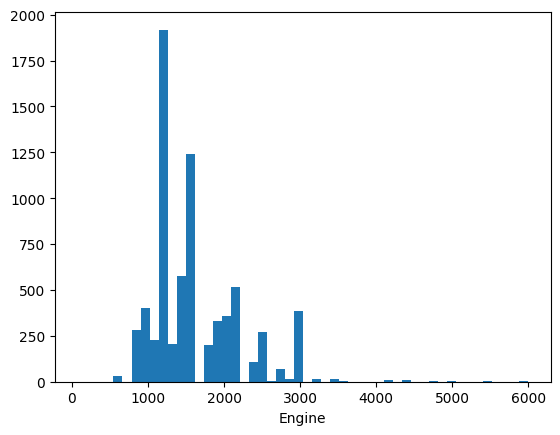

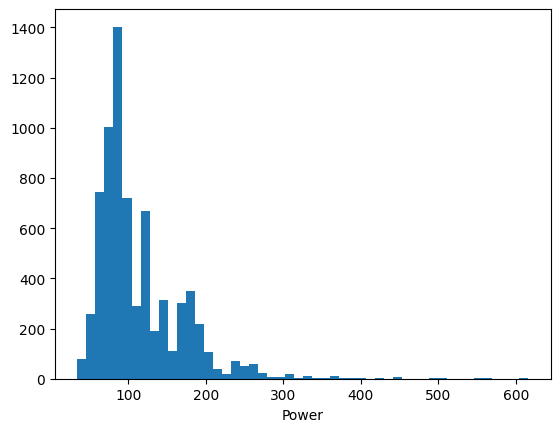

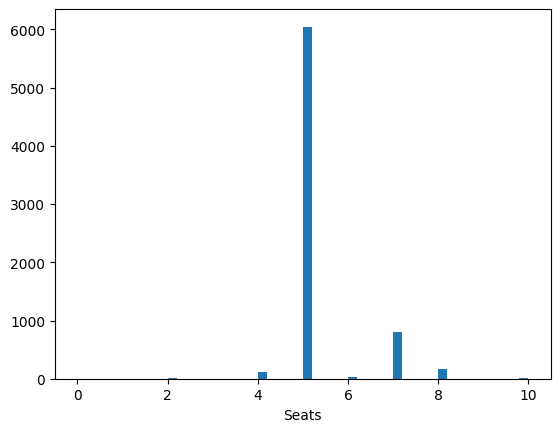

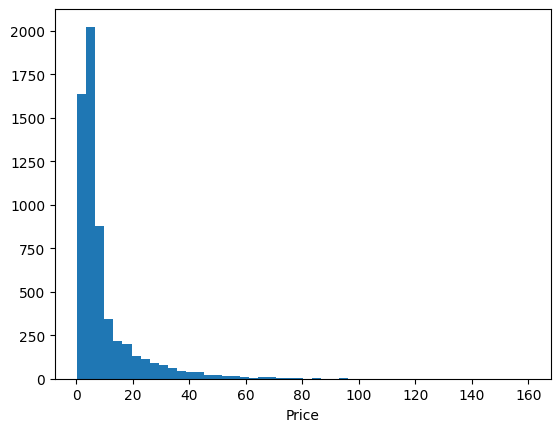

In [15]:
from math import sqrt
for col in col_list:
    bin = (dataset[col].max() - dataset[col].min()) / sqrt(dataset[col].count())
    plt.hist(dataset[col], bins=50)
    plt.xlabel(col)
    plt.show()

After observe the graph of "Car_Age", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price", Non of these are normal distribution

In [46]:
# Calculate the mean and standard deviation of each column
summary_stats = pd.DataFrame({
    "Mean": dataset[col_list].mean(),
    "Std": dataset[col_list].std(),
    "25th": (first:=dataset[col_list].quantile(0.25)),
    "75th": (third:=dataset[col_list].quantile(0.75)),
    "IQR": (IQR:=(third - first)),
    "Lower Limit": first - 1.5 * IQR,
    "Upper Limit": third + 1.5 * IQR
})
summary_stats


,Mean,Std,25th,75th,IQR,Lower Limit,Upper Limit
Car_Age,10.634634,3.254421,8.00,13.00,5.00,0.500,20.500
Kilometers_Driven,58699.063146,84427.720583,34000.00,73000.00,39000.00,-24500.000,131500.000
Mileage,18.241666,4.839427,15.26,21.10,5.84,6.500,29.860
Engine,1616.573470,595.285137,1198.00,1968.00,770.00,43.000,3123.000
Power,112.765214,53.493553,75.00,138.10,63.10,-19.650,232.750
Seats,5.279722,0.811660,5.00,5.00,0.00,5.000,5.000
Price,9.479468,11.187917,3.50,9.95,6.45,-6.175,19.625


In [17]:
outlier_count = {"Column": [], "Number of Outlier":[]}
for col in col_list:
    less_than_lower = len(dataset[dataset[col] < summary_stats.loc[col, "Lower Limit"]])
    greater_than_upper = len(dataset[dataset[col] > summary_stats.loc[col, "Upper Limit"]])
    outlier_count["Column"].append(col)
    outlier_count["Number of Outlier"].append(less_than_lower + greater_than_upper)
outlier = pd.DataFrame(outlier_count).set_index("Column")
outlier.index.name = None
outlier

,Number of Outlier
Car_Age,58
Kilometers_Driven,258
Mileage,133
Engine,65
Power,273
Seats,1153
Price,718


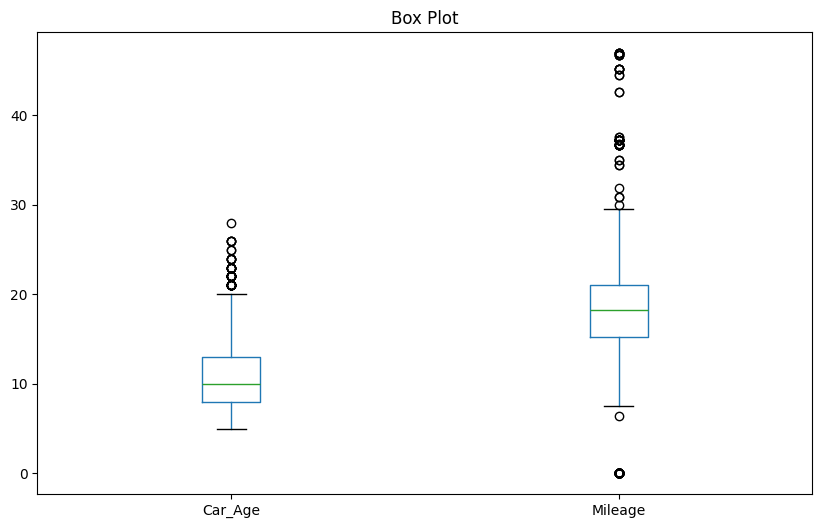

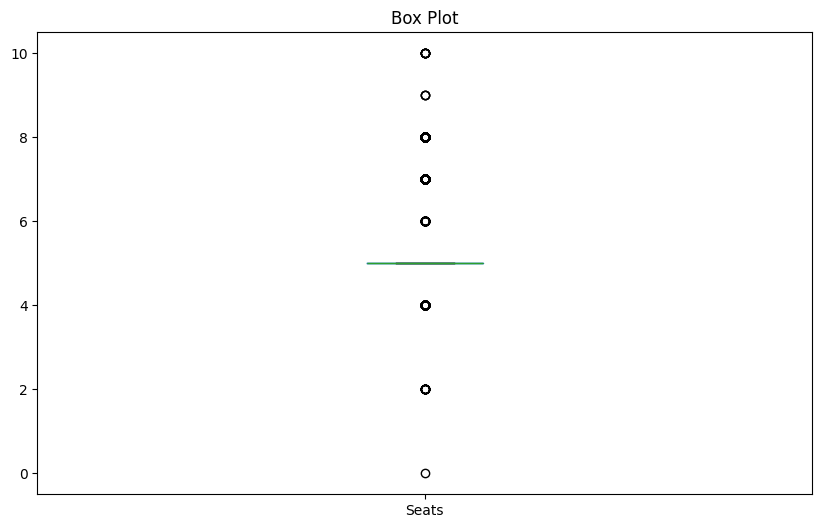

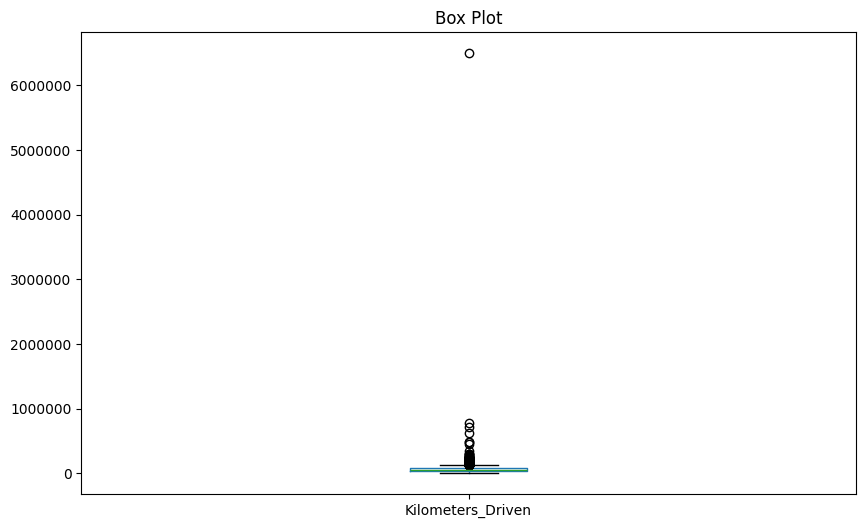

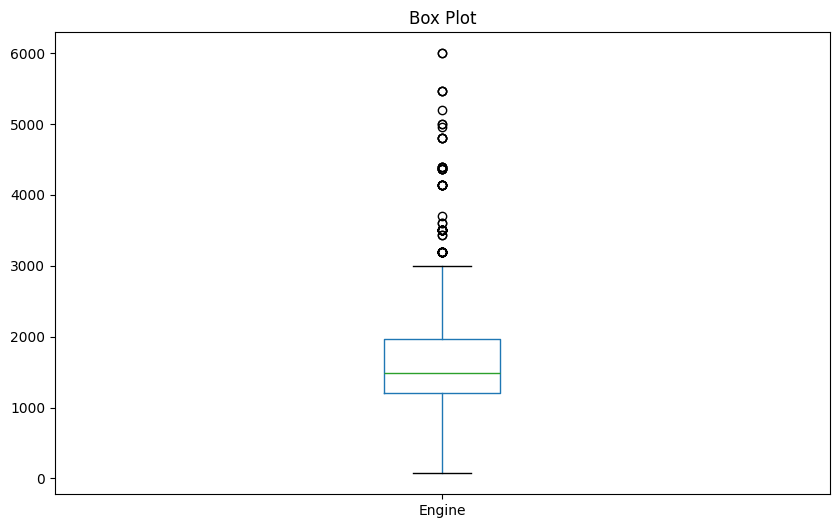

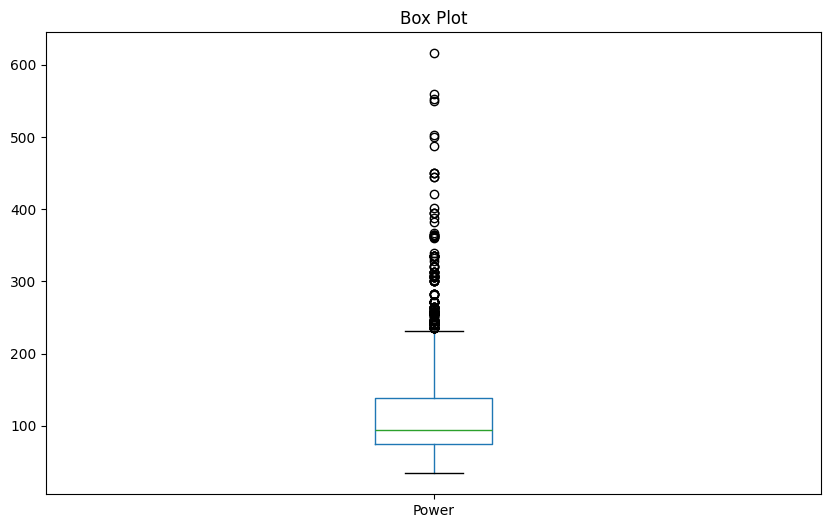

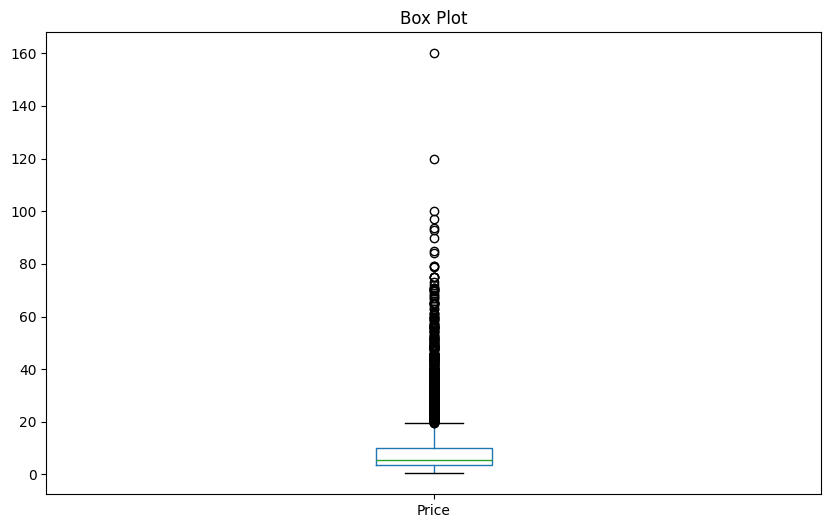

In [18]:
# Draw box plot
cols = [["Car_Age", "Mileage"], "Seats", "Kilometers_Driven","Engine", "Power","Price"]
for col in cols:
    plt.figure(figsize=(10, 6))
    dataset.boxplot(column=col)
    plt.title("Box Plot")
    plt.grid(False)
    plt.ticklabel_format(style='plain', axis='y')
    # plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

C:\Users\minhh\AppData\Local\Temp\ipykernel_36260\3656307016.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=fuel_types)


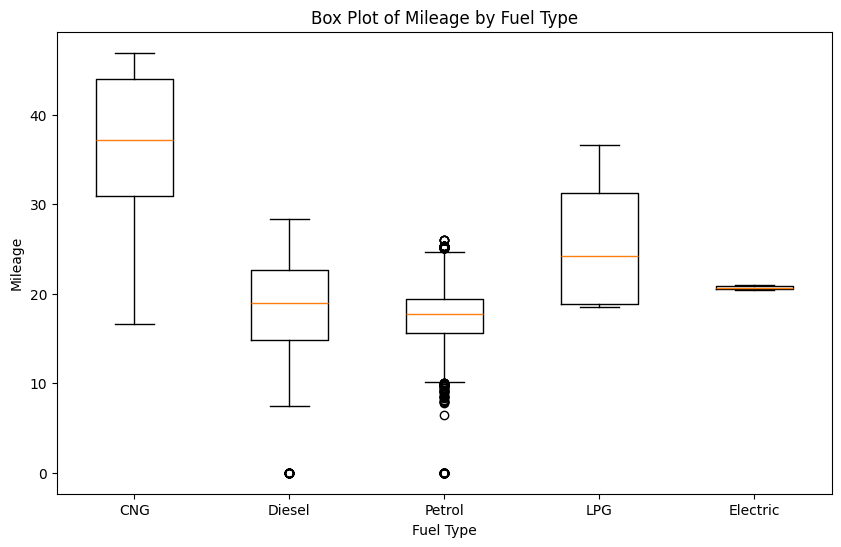

In [19]:
# Group Fuel type and mileage
fuel_types = dataset['Fuel_Type'].unique()
data = [dataset[dataset['Fuel_Type'] == fuel]['Mileage'] for fuel in fuel_types]
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=fuel_types)
plt.title('Box Plot of Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.show()

### 4. Pearson correlation coeffocoemt and scatter plot

In [20]:
# list of column to work on
col_list = ["Car_Age", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price"]

In [32]:
# form pairs
pairs = []
for i in range(len(col_list) - 1):
    for j in range(i + 1, len(col_list)):
        pairs.append([col_list[i], col_list[j]])
pairs

[['Car_Age', 'Kilometers_Driven'],
 ['Car_Age', 'Mileage'],
 ['Car_Age', 'Engine'],
 ['Car_Age', 'Power'],
 ['Car_Age', 'Seats'],
 ['Car_Age', 'Price'],
 ['Kilometers_Driven', 'Mileage'],
 ['Kilometers_Driven', 'Engine'],
 ['Kilometers_Driven', 'Power'],
 ['Kilometers_Driven', 'Seats'],
 ['Kilometers_Driven', 'Price'],
 ['Mileage', 'Engine'],
 ['Mileage', 'Power'],
 ['Mileage', 'Seats'],
 ['Mileage', 'Price'],
 ['Engine', 'Power'],
 ['Engine', 'Seats'],
 ['Engine', 'Price'],
 ['Power', 'Seats'],
 ['Power', 'Price'],
 ['Seats', 'Price']]

In [22]:
def exclude_outlier(data: pd.DataFrame, col_pair) -> pd.DataFrame:
    limit = summary_stats.iloc[:, -2:]
    col_1_lower, col_1_upper = limit.loc[col_pair[0]]
    col_2_lower, col_2_upper = limit.loc[col_pair[1]]
    result = data[(data[col_pair[0]] >= col_1_lower) & (data[col_pair[0]] <= col_1_upper) &
                  (data[col_pair[1]] >= col_2_lower) & (data[col_pair[1]] <= col_2_upper)]
    return result

In [25]:
def calculate_correlation(data: pd.DataFrame, pair):
    x, y = pair
    x_mean, x_std = data[x].mean(), data[x].std()
    y_mean, y_std = data[y].mean(), data[y].std()
    covariance = (1/len(data)) * np.sum((data[x] - x_mean) * (data[y] - y_mean))
    result = covariance/(x_std * y_std)
    return result


In [37]:
for pair in pairs:
    clean_data = exclude_outlier(dataset, pair)
    result = calculate_correlation(clean_data, pair)
    print(result)

0.50879362887119
-0.30159640786466796
0.05371403839093019
-0.01895092607124155
nan
-0.3480973002124971
-0.13603483742391737
0.17328937100870173
0.06480917091409732
nan
-0.07058428685952206
-0.6406618318518363
-0.5357412832815256
nan
-0.2541401612135309
0.8031532034859731
nan
0.6090396705496632
nan
0.6905723125095931
nan


C:\Users\minhh\AppData\Local\Temp\ipykernel_36260\653657727.py:6: RuntimeWarning: invalid value encountered in scalar divide
  result = covariance/(x_std * y_std)


In [36]:
matrix = clean_data['Car_Age'].corr(clean_data['Kilometers_Driven'], method="pearson")
matrix

0.5088669103963045

In [42]:
lean_data = exclude_outlier(dataset, ['Car_Age', 'Seats'])

In [43]:
lean_data.query('Seats != Seats')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age


In [44]:
lean_data.query('Car_Age != Car_Age')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age


In [45]:
result = calculate_correlation(lean_data, ['Car_Age', 'Seats'])

C:\Users\minhh\AppData\Local\Temp\ipykernel_36260\653657727.py:6: RuntimeWarning: invalid value encountered in scalar divide
  result = covariance/(x_std * y_std)


In [47]:
lean_data['Car_Age'].mean(), lean_data['Car_Age'].std()

(10.557701915070774, 3.092383248935864)

In [48]:
lean_data['Seats'].mean(), lean_data['Seats'].std()

(5.0, 0.0)

In [50]:
lean_data['Seats'].unique()

array([5.])